In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Limpieza y Transformación de los Datos
#Cargar el conjunto de datos
try:
    df = pd.read_csv('heart.csv')
except FileNotFoundError:
    print("Error: El archivo 'heart.csv' no se encontró. Asegúrese de que esté en el mismo directorio.")
    exit()

In [12]:
#Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    string 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), string(1)
memory usage: 33.3 KB


In [5]:
#Conteo de valores nulos por columna
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [14]:
# Revisar valores únicos en columnas
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [11]:
df['sex'] = df['sex'].astype('string')

In [15]:
df['sex'] = df['sex'].replace('1', 'M')

In [13]:
df['sex'] = df['sex'].replace('0', 'F')

In [16]:
#Primeras 5 filas del dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,M,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,M,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,F,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,M,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,F,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
#Análisis Exploratorio de Datos (EDA)
# Resumen estadístico de las variables numéricas
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [26]:
# Selecciona solo las columnas numéricas del DataFrame
df_numeric = df.select_dtypes(include=['number'])

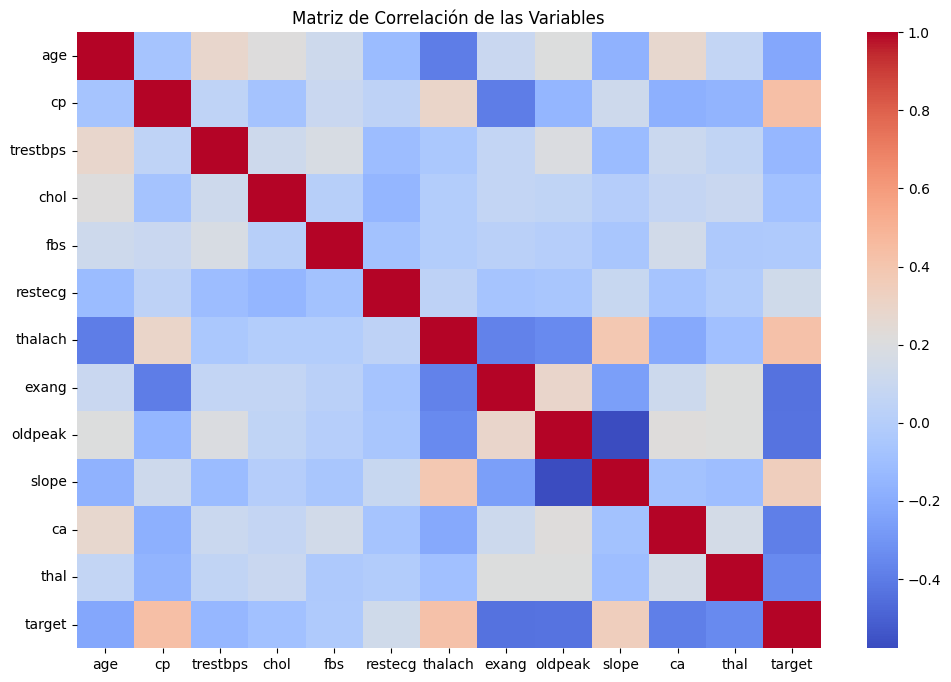

In [28]:
# Correlación entre las variables numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(),cmap='coolwarm')
plt.title('Matriz de Correlación de las Variables')
plt.show()

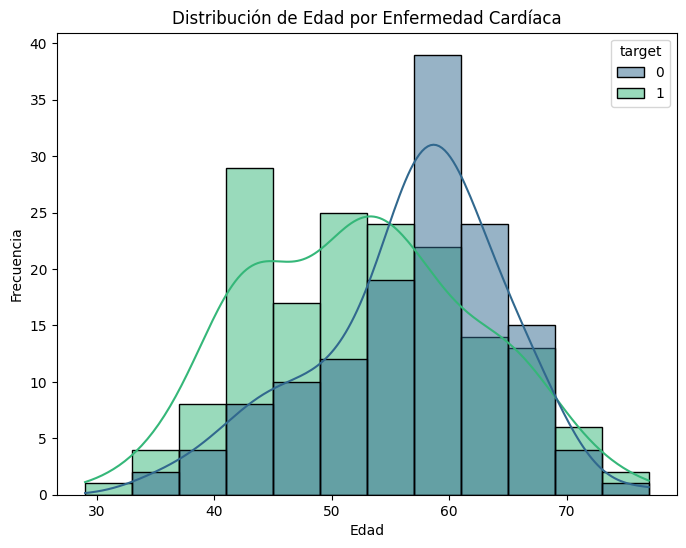

In [19]:
# Análisis de la relación entre variables clave y la variable objetivo
# Edad y enfermedad cardíaca
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='target', kde=True, palette='viridis')
plt.title('Distribución de Edad por Enfermedad Cardíaca')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

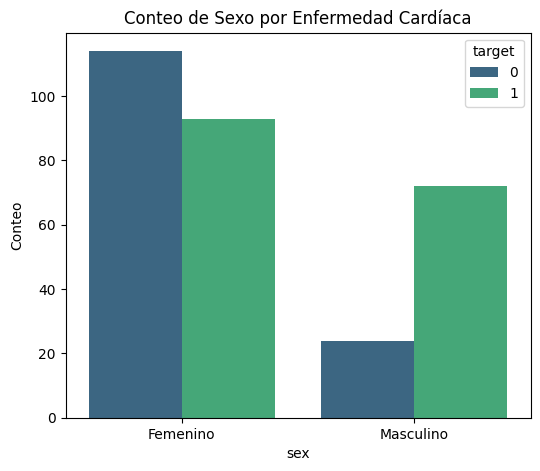

In [43]:
# Sexo y enfermedad cardíaca
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='sex', hue='target', palette='viridis')
plt.title('Conteo de Sexo por Enfermedad Cardíaca')
plt.ylabel('Conteo')
plt.xticks(ticks=[0, 1], labels=['Femenino', 'Masculino'])
plt.show()

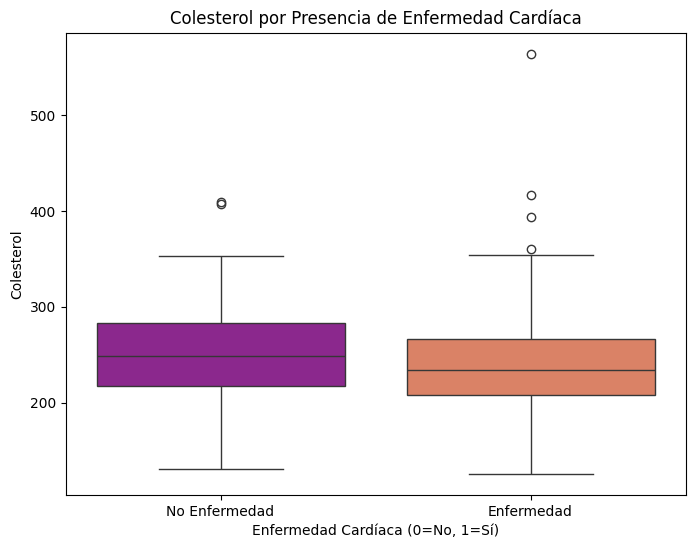

In [12]:
# Boxplot de Colesterol por presencia de Enfermedad Cardíaca
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='chol', data=df,hue='target', palette='plasma', legend=False)
plt.title('Colesterol por Presencia de Enfermedad Cardíaca')
plt.xlabel('Enfermedad Cardíaca (0=No, 1=Sí)')
plt.ylabel('Colesterol')
plt.xticks(ticks=[0, 1], labels=['No Enfermedad', 'Enfermedad'])
plt.show()

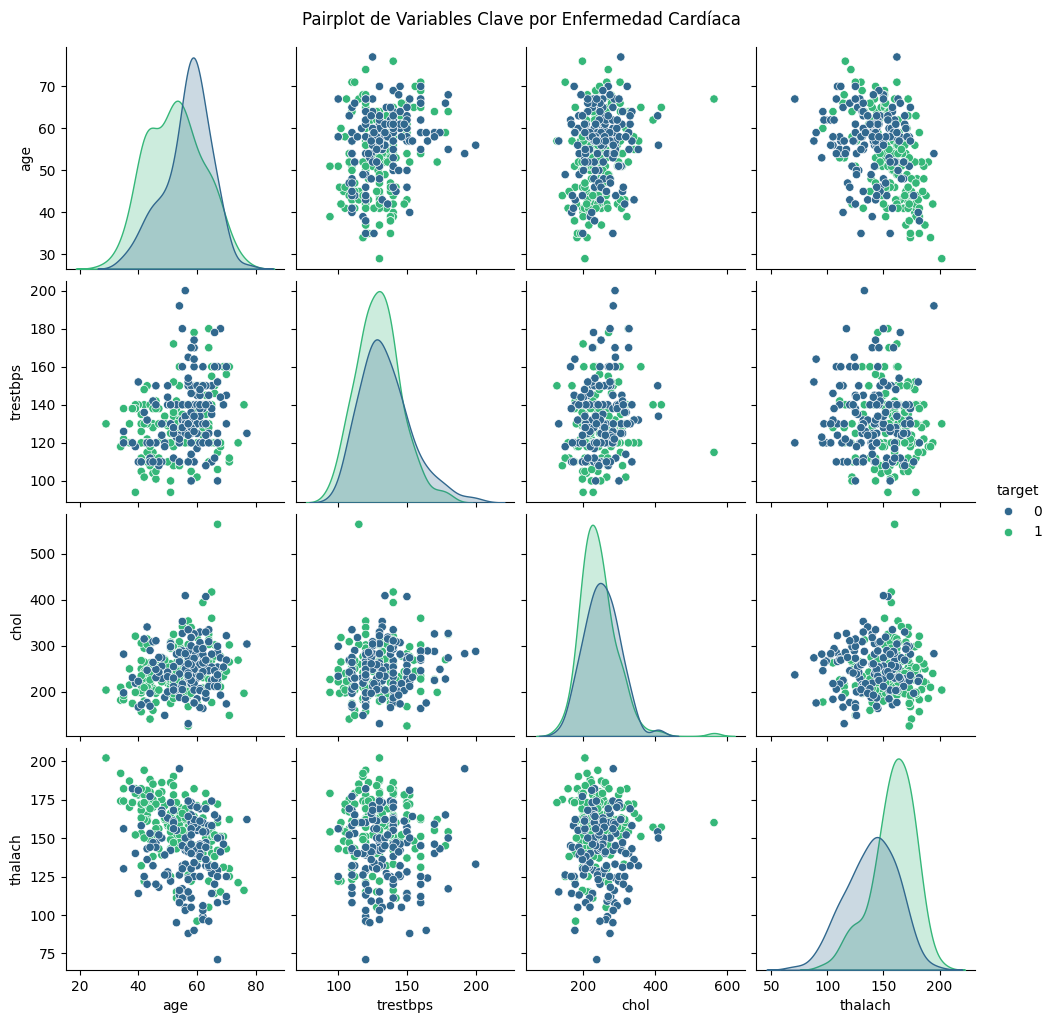

In [13]:
# Pairplot para algunas variables
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot de Variables Clave por Enfermedad Cardíaca', y=1.02)
plt.show()